# Load Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Read Data

In [2]:
# Read data from 2016-2017 school year
college_data_df = pd.read_csv('data/MERGED2016_17_PP.csv', dtype=str)
college_data_df[college_data_df=='PrivacySuppressed'] = np.nan

# Create separate dataframe for community colleges
community_college_data_df = college_data_df[
    (college_data_df['CONTROL']=='1') & 
    (college_data_df['PREDDEG'] != '3') & 
    (college_data_df['PREDDEG'] != '4')
]

# Explore Data

### How many colleges were there?

In [3]:
# Calculate total number of colleges and community colleges
all_colleges = len(college_data_df)
community_colleges = len(community_college_data_df)

# Calculate percentage of colleges that are community-based
print('Total colleges: ', all_colleges)
print('Total community colleges: ', community_colleges)
print('Percentage of colleges that are community-based:', 100*community_colleges/all_colleges)

Total colleges:  7175
Total community colleges:  1451
Percentage of colleges that are community-based: 20.222996515679444


### How many students were enrolled in college?

In [4]:
# Calculate total number of students in colleges and community colleges
all_college_students = college_data_df['UGDS'].astype(float).sum()
community_college_students = community_college_data_df['UGDS'].astype(float).sum()

# Calculate percentage of college students enrolled in community colleges
print('Total college  students: ', all_college_students)
print('Total community college students: ', community_college_students)
print('Percentage of college students in community colleges:', 100*community_college_students/all_college_students)

Total college  students:  15627822.0
Total community college students:  5708140.0
Percentage of college students in community colleges: 36.525499202640006


### How long does it take for students to repay loans?

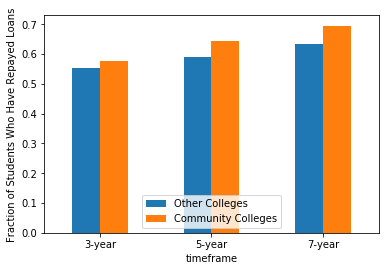

In [5]:
# Calculate repayment rates of colleges
other_college_3year_repayment = college_data_df.loc[
    college_data_df['OPEID'].apply(lambda x: x not in community_college_data_df['OPEID'].values),
    'COMPL_RPY_3YR_RT'].astype(float).mean()
community_college_3year_repayment = community_college_data_df['COMPL_RPY_3YR_RT'].astype(float).mean()
other_college_5year_repayment = college_data_df.loc[
    college_data_df['OPEID'].apply(lambda x: x not in community_college_data_df['OPEID'].values),
    'COMPL_RPY_5YR_RT'].astype(float).mean()
community_college_5year_repayment = community_college_data_df['COMPL_RPY_5YR_RT'].astype(float).mean()
other_college_7year_repayment = college_data_df.loc[
    college_data_df['OPEID'].apply(lambda x: x not in community_college_data_df['OPEID'].values),
    'COMPL_RPY_7YR_RT'].astype(float).mean()
community_college_7year_repayment = community_college_data_df['COMPL_RPY_7YR_RT'].astype(float).mean()

college_repayment_df = pd.DataFrame({
    'timeframe': ['3-year', '5-year', '7-year'],
    'other_college_repayment': [
        other_college_3year_repayment, 
        other_college_5year_repayment, 
        other_college_7year_repayment
    ],
    'community_college_repayment': [
        community_college_3year_repayment, 
        community_college_5year_repayment, 
        community_college_7year_repayment
    ]
})

college_repayment_df.plot(
    kind='bar', 
    x='timeframe', 
    y=['other_college_repayment', 'community_college_repayment'], 
    rot=0)
plt.legend(['Other Colleges', 'Community Colleges'], loc='lower center')
plt.ylabel('Fraction of Students Who Have Repayed Loans')
plt.show()

In [6]:
college_repayment_df

,timeframe,other_college_repayment,community_college_repayment
0,3-year,0.551726,0.576612
1,5-year,0.590572,0.644465
2,7-year,0.634108,0.695360
